In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [44]:
import seaborn as sns
%matplotlib inline

In [45]:
df = pd.read_csv("vacancies.csv", delimiter=';')
df.head()

,Наименование_вакансии,Ссылка_на_вакансию,Опыт_работы,Ключевые_навыки,Зарплата
0,Data Scientist ООО ХАЙТЕКИНЖИНИРИНГ,https://hh.ru/vacancy/48101680?query=data%20sc...,1–3 года,"['Python', 'PyTorch', 'Keras', 'Tensorflow', '...",от200 000руб.довычетаналогов
1,Data Scientist (antifraud) Авито,https://hh.ru/vacancy/48120590?query=data%20sc...,3–6 лет,"['Python', 'Data Science', 'Машинное обучение']",з/пнеуказана
2,Data Scientist (команда Поиска) HeadHunter::An...,https://hh.ru/vacancy/46048820?query=data%20sc...,3–6 лет,"['Python', 'PyTorch', 'SQL', 'Machine Learning...",з/пнеуказана
3,Senior Data Scientist (Computer Vision) - Synt...,https://hh.ru/vacancy/48212689?query=data%20sc...,3–6 лет,"['Python', 'Linux', 'Английский язык', 'Comput...",з/пнеуказана
4,Системный аналитик\ data scientist HFLabs,https://hh.ru/vacancy/47688264?query=data%20sc...,1–3 года,"['Бизнес-анализ', 'SQL', 'Системный анализ', '...",от190 000до250 000руб.наруки


In [46]:
df = df.drop(["Наименование_вакансии", "Ссылка_на_вакансию"], axis=1)

In [47]:
df = df.drop(df[df.Опыт_работы == "Опыт_работы"].index)

In [48]:
pd.DataFrame(df.Зарплата == 'з/пнеуказана').sum()

Зарплата    284
dtype: int64

In [49]:
pd.DataFrame(df.Зарплата != 'з/пнеуказана').sum()

Зарплата    62
dtype: int64

In [50]:
pd.DataFrame(df.Зарплата == None).sum()

Зарплата    0
dtype: int64

In [51]:
df_train = df.drop(df[(df.Зарплата == "з/пнеуказана") | (df.Зарплата == np.NaN)].index)

In [52]:
df_train.shape

(62, 3)

In [53]:
pd.isna(df_train['Зарплата'].index)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [54]:
from pprint import pprint
skills_dict = {}
for line in df_train["Ключевые_навыки"]:    
    for skill in line.split("', '"):
        skill = skill.lower()
        if skill[:2] == "['":
            skill = skill[2:]
        elif skill[-2:] == "']":
            skill = skill[:-2]
        if skill == 'ml':
            skill = 'machine learning'
        if ' ' in skill:
            skill.replace(' ', '')
        if skill in skills_dict:
            skills_dict[skill] += 1
        else:
            skills_dict[skill] = 1
pprint(skills_dict)

skills_df = pd.DataFrame(list(skills_dict.items()), columns=["Skill", "Frequency"])

{'3d': 1,
 '[]': 3,
 'a/b тесты': 2,
 'adobe photoshop': 1,
 'agile project management': 1,
 'ai': 4,
 'analytical skills': 2,
 'ansi sql': 3,
 'artificial intelligence': 1,
 'asr': 1,
 'aws': 3,
 'big data': 4,
 'bigartm': 1,
 'business communication': 1,
 'c++': 2,
 'clickhouse': 1,
 'computer vision': 8,
 'cv': 1,
 'dask': 3,
 'data analysis': 8,
 'data mining': 5,
 'data science': 10,
 'data scientist': 1,
 'deep learning': 12,
 'digital marketing': 1,
 'docker': 3,
 'dynamic pricing': 1,
 'elasticsearch': 3,
 'etl': 1,
 'executive search': 1,
 'flask': 1,
 'git': 5,
 'google colab': 1,
 'hadoop': 2,
 'headhunting': 1,
 'hive': 1,
 'information technology': 1,
 'iot': 3,
 'jira': 2,
 'jupyter': 3,
 'kafka': 1,
 'keras': 5,
 'leadership skills': 2,
 'lgbm': 1,
 'linux': 4,
 'machine learning': 34,
 'marketing analysis': 1,
 'mathematical analysis': 1,
 'matlab': 1,
 'matplotlib': 4,
 'mobile': 1,
 'ms powerpoint': 3,
 'ms visio': 1,
 'ner': 2,
 'nlp': 8,
 'notebook': 1,
 'numpy': 10

In [55]:
skills_df = skills_df.drop(skills_df[skills_df["Frequency"] == 1].index)
skills_df.head(20)

,Skill,Frequency
0,python,51
1,pytorch,16
2,keras,5
3,tensorflow,9
4,git,5
5,deep learning,12
6,computer vision,8
7,linux,4
8,анализ данных,7
9,scipy,4


In [56]:
sorted_skills = skills_df.sort_values(by="Frequency", ascending=False)
sorted_skills.head(20)

,Skill,Frequency
0,python,51
12,machine learning,34
16,sql,25
43,pandas,16
1,pytorch,16
22,английский язык,15
5,deep learning,12
27,data science,10
39,numpy,10
31,математическая статистика,10


<AxesSubplot:xlabel='Frequency', ylabel='Skill'>

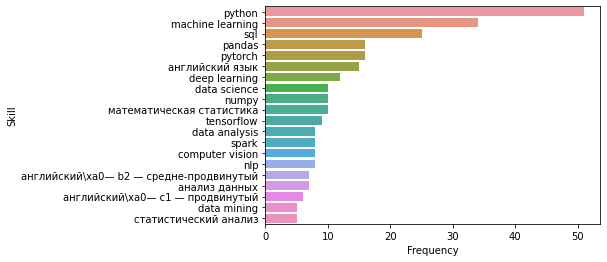

In [57]:
sns.barplot(data=sorted_skills.head(20), x="Frequency", y="Skill")

In [58]:
label_encoder = LabelEncoder()
df_train["Опыт_работы"] = label_encoder.fit_transform(df_train["Опыт_работы"])
print(dict(enumerate(label_encoder.classes_)))

{0: '1–3 года', 1: '3–6 лет', 2: 'более 6 лет', 3: 'не требуется'}


In [84]:
df_train.iloc[37]

Опыт_работы                                                        2
Ключевые_навыки    ['ML', 'AWS', 'ANSI SQL', 'NumPy', 'SciPy', 's...
Зарплата                                   от4 000USDдовычетаналогов
Name: 158, dtype: object

In [108]:
X_train = df_train.drop(['Зарплата'], axis=1)
y_train = df_train["Зарплата"]

In [109]:
y_train = y_train.str.extract(r'(\d+[.\d]*\s\d[.\d]*.*[рUE][уSU][бDR])')
y_train.head()


,0
0,200 000руб
4,190 000до250 000руб
5,3 000до5 000USD
6,50 000до80 000руб
7,100 000руб


In [110]:
def get_currency(s):
    try:
        return s[-3:]
    except:
        pass
    
y_train = pd.DataFrame(data=y_train.values, columns=['Salary'])
y_train["Currency"] = y_train["Salary"].apply(get_currency)

In [111]:
import re
def get_salary(s):
    s = s[:-3]
    if "до" in s:
        s = s.split("до")
        s[0] =  "".join(re.findall(r'\d+', s[0]))
        s[1] =  "".join(re.findall(r'\d+', s[0])) 
        s = (int(s[0]) + int(s[1])) // 2
    else: 
        s = "".join(re.findall(r'\d+', s))
        s = int(s)
    
    return s
y_train["Salary"] = y_train["Salary"].apply(get_salary)

In [112]:
y_train.head()

,Salary,Currency
0,200000,руб
1,190000,руб
2,3000,USD
3,50000,руб
4,100000,руб


In [113]:
print(type(y_train.Currency.unique()[2])) 

<class 'str'>


In [114]:
y_train_unique_currency = y_train.groupby('Currency')["Salary"].count()
print(y_train_unique_currency)
print(y_train.shape)

Currency
EUR     1
USD     6
руб    55
Name: Salary, dtype: int64
(62, 2)
